In [69]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from numpy.random import choice
from numpy.lib import pad
from math import sqrt, floor, ceil

In [2]:
def load_data(file):
    return loadmat(file)

In [34]:
data = load_data('./ex3data1.mat')
X = data['X']
y = data['y']

print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


### 1.2 Visualizing the data

In [101]:
def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array looks like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))


def unblockshaped(arr, h, w):
    """
    Return an array of shape (h, w) where
    h * w = arr.size

    If arr is of shape (n, nrows, ncols), n sublocks of shape (nrows, ncols),
    then the returned array preserves the "physical" layout of the sublocks.
    """
    n, nrows, ncols = arr.shape
    return (arr.reshape(h//nrows, -1, nrows, ncols)
               .swapaxes(1,2)
               .reshape(h, w))

In [53]:
def pad_with_ones(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 1
    vector[-pad_width[1]:] = 1
    return vector

In [113]:
def display_data(data):
    imgs = np.array([pad(data[i].reshape(20, 20).T, 1, pad_with_ones) for i in range(len(data))])
    
    m, height, width = imgs.shape
    n_row = floor(sqrt(m))
    n_col = ceil(m/n_row)
    
    imgs = unblockshaped(imgs, n_row*imgs.shape[1], n_col*imgs.shape[2])
    
    plt.gray()
    plt.imshow(imgs)

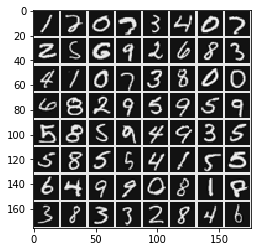

In [114]:
sample_data = X[choice(X.shape[0], 64, replace=False)]
display_data(sample_data)

### 1.3.1 Vectorizing the cost function